# Modelo Preditivo

Aqui neste notebook, iremos mostrar como treinamos um modelo de regressão para predizer o tamanho da produção, a partir do ano, com dados de produção de colheitas de vários países do mundo. Fizemos o treino usando dados de todos os países e apenas do Brasil.

Também discutimos, como um modelo Machine Learning aponta um cenário otimista para o futuro, e qual a predição para a produção de 2030 e 2050 


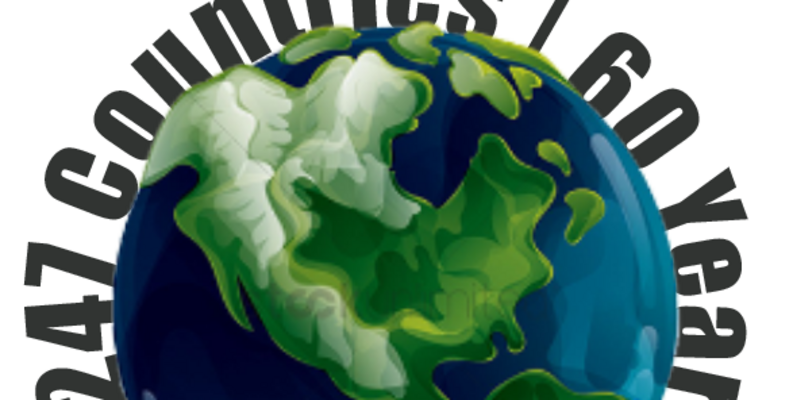

## Imports necessários para o treinamento

In [166]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Coleta dos dados

In [167]:
#Dados agrícolas de alimentos
dados_crop1 = pd.read_csv('crop1.csv')

#Dados agrícolas de animais
dados_live1 = pd.read_csv('live1.csv')


### Explicação do conteúdo dos arquivos

**Area**: Refere-se ao país ou região geográfica específica em que os dados foram registrados. Por exemplo, "Norway" indica a Noruega e "Oman" indica Omã.

**Item**: Representa o item agrícola ou categoria a que os dados se referem. No exemplo fornecido, temos "Wheat" (trigo) e "Bananas" (bananas). Como também, no segundo arquivo, os dados coletados já são voltados para animais como itens, como Vaca e Porcos.

**Element**: Indica a natureza do dado registrado. Pode se referir a aspectos como produção, área colhida, consumo, etc. No arquivo, temos "Production" (produção) para o trigo e "Area harvested" (área colhida) para as bananas.

**Year**: Indica o ano em que os dados foram registrados.

**Unit**: Refere-se à unidade de medida dos valores registrados. No exemplo, a unidade é "tonnes" (toneladas) para a produção de trigo e "ha" (hectares) para a área colhida de bananas.

**Value**: Representa o valor numérico dos dados registrados para o campo específico. Por exemplo, 395,400 toneladas de trigo foram produzidas na Noruega em 2005.

### Informações e descrições básicas do conteúdo coletado

In [168]:
dados_crop1.head()

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,"Almonds, with shell",Area harvested,1975,ha,0.0
1,Afghanistan,"Almonds, with shell",Area harvested,1976,ha,5900.0
2,Afghanistan,"Almonds, with shell",Area harvested,1977,ha,6000.0
3,Afghanistan,"Almonds, with shell",Area harvested,1978,ha,6000.0
4,Afghanistan,"Almonds, with shell",Area harvested,1979,ha,6000.0


### Resgatando os types das colunas

In [169]:
dados_crop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895975 entries, 0 to 1895974
Data columns (total 6 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Area     object 
 1   Item     object 
 2   Element  object 
 3   Year     int64  
 4   Unit     object 
 5   Value    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 86.8+ MB


### Descrição básica do primeiro arquivo

In [170]:
dados_crop1.describe()

,Year,Value
count,1.895975e+06,1.766475e+06
mean,1.992321e+03,1.077275e+06
std,1.718118e+01,1.403138e+07
min,1.961000e+03,0.000000e+00
25%,1.978000e+03,4.500000e+03
50%,1.994000e+03,2.687500e+04
75%,2.007000e+03,1.303910e+05
max,2.020000e+03,1.955308e+09


In [171]:
dados_live1.head()

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,Asses,Stocks,1961,Head,1300000.0
1,Afghanistan,Asses,Stocks,1962,Head,851850.0
2,Afghanistan,Asses,Stocks,1963,Head,1001112.0
3,Afghanistan,Asses,Stocks,1964,Head,1150000.0
4,Afghanistan,Asses,Stocks,1965,Head,1300000.0


In [172]:
dados_live1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122458 entries, 0 to 122457
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Area     122458 non-null  object 
 1   Item     122458 non-null  object 
 2   Element  122458 non-null  object 
 3   Year     122458 non-null  int64  
 4   Unit     122458 non-null  object 
 5   Value    120194 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.6+ MB


In [173]:
dados_live1.describe()

,Year,Value
count,122458.000000,1.201940e+05
mean,1991.376439,1.035597e+07
std,17.260431,5.869386e+07
min,1961.000000,0.000000e+00
25%,1976.000000,5.300000e+03
50%,1992.000000,1.021735e+05
75%,2006.000000,1.561571e+06
max,2020.000000,1.525939e+09


In [174]:
#Removendo os espaços nulos
dados_crop1.dropna(inplace=True)
dados_live1.dropna(inplace=True)


## Separando os dados 'Year' e 'Value'

##### A separação é feita com o intuito de escolher o alvo de treinamento

In [175]:
X = dados_live1[['Year']]
y = dados_live1['Value']

## Declarando as variáveis de treinamento

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Aplicando o treinamento de regressão

In [177]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [178]:
y_pred = regressor.predict(X_test)


In [179]:
mse = mean_squared_error(y_test, y_pred)


In [180]:
# Fazer previsões
y_pred = regressor.predict(X_test)

# Avaliar o desempenho do modelo
from sklearn.metrics import mean_squared_error, r2_score

# Calcular o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print("Erro médio quadrático (MSE):", mse)

# Calcular o coeficiente de determinação (R²)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinação (R²):", r2)


Erro médio quadrático (MSE): 3751667752400417.5
Coeficiente de determinação (R²): 0.00024200247051597845


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## Treino separando todos os países ecxeto Brasil

#### Os dados são separados em variáveis de treinamento (X) e variável de destino (y) para o treinamento do modelo de regressão linear. Em seguida, é aplicado o treinamento do modelo e são feitas previsões usando o conjunto de teste. O desempenho do modelo é avaliado usando o erro médio quadrático (MSE) e o coeficiente de determinação (R²).

In [181]:
# Carregar os dados
data_agricola = pd.read_csv('crop1.csv')

In [182]:
# Filtrar os dados para países "a" (todos os países exceto o Brasil)
data_a = data_agricola[data_agricola['Area'] != 'Brazil']

In [183]:
# Filtrar os dados para país "b" (Brasil)
data_b = data_agricola[data_agricola['Area'] == 'Brazil']

### Verificando se existem valores ausentes nos dados

In [184]:
print("Valores ausentes em data_a:")
print(data_a.isnull().sum())

Valores ausentes em data_a:
Area            0
Item            0
Element         0
Year            0
Unit            0
Value      129034
dtype: int64


In [185]:
print("Valores ausentes em data_b:")
print(data_b.isnull().sum())

Valores ausentes em data_b:
Area         0
Item         0
Element      0
Year         0
Unit         0
Value      466
dtype: int64


In [186]:
# Remover linhas com valores ausentes em data_b
data_a.dropna(inplace=True)

C:\Users\Shima\AppData\Local\Temp\ipykernel_3296\621906742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_a.dropna(inplace=True)


In [187]:
# Remover linhas com valores ausentes em data_b
data_b.dropna(inplace=True)

C:\Users\Shima\AppData\Local\Temp\ipykernel_3296\453271985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_b.dropna(inplace=True)


#### Divisão em conjunto de treinamento e teste: Os dados foram divididos em conjuntos de treinamento e teste para o país "a" usando o método train_test_split(). Foi especificada uma proporção de 80% para treinamento e 20% para teste.

In [188]:
# Dividir os dados de "a" em X (ano) e y (produção) (RESTO DO MUNDO)
X_a = data_a[['Year']]
y_a = data_a[['Value']]

In [189]:
# Dividir os dados de "b" em X (ano) e y (produção) (APENAS O BRASIL
X_b = data_b[['Year']]
y_b = data_b[['Value']]

In [190]:
# Dividir os dados de "a" em conjunto de treinamento e teste
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a, y_a, test_size=0.2, random_state=42)

#### Concatenação dos dados: Os dados de X e y para os países "a" e "b" foram concatenados para formar conjuntos de treinamento combinados. Isso foi feito para treinar o modelo com dados de todos os países.

In [191]:
# Juntar os dados de "a" e "b" para treinamento
X_train = pd.concat([X_a_train, X_b])
y_train = pd.concat([y_a_train, y_b])

#### Treinamento do modelo com os dados de todos os países: O modelo de regressão linear foi treinado usando os dados de todos os países combinados (X_train e y_train) por meio do método fit().

In [192]:
# Criar uma instância do modelo de regressão linear
regressor = LinearRegression()

# Treinar o modelo com os dados de todos os países
regressor.fit(X_train, y_train)

LinearRegression()

#### Verificação de valores ausentes em y_a e y_b: Verificamos novamente se existem valores ausentes nas variáveis dependentes y_a e y_b. Não foram encontrados valores ausentes após a remoção de linhas com valores ausentes anteriormente.

In [193]:
y_b.dropna(inplace=True)

C:\Users\Shima\AppData\Local\Temp\ipykernel_3296\4045064116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_b.dropna(inplace=True)


In [194]:
# Verificar a forma dos dados
print("Forma de X_b:", X_b.shape)
print("Forma de y_b:", y_b.shape)

Forma de X_b: (10735, 1)
Forma de y_b: (10735, 1)


#### Previsão e avaliação do modelo para o país "a": Com o modelo treinado, foram feitas previsões para o conjunto de teste do país "a" (X_a_test) usando o método predict(). Em seguida, foram calculadas as métricas de erro médio quadrático (MSE) e coeficiente de determinação (R²) usando as funções mean_squared_error() e r2_score(), respectivamente.


In [195]:
# Fazer previsões para o conjunto de teste de "a"
y_a_pred = regressor.predict(X_a_test)

In [196]:
# Avaliar o desempenho do modelo para o conjunto de teste de "a"
mse_a = mean_squared_error(y_a_test, y_a_pred)
r2_a = r2_score(y_a_test, y_a_pred)

In [197]:
print("Erro médio quadrático (MSE) para 'a':", mse_a)
print("Coeficiente de determinação (R²) para 'a':", r2_a)


Erro médio quadrático (MSE) para 'a': 186311402602264.25
Coeficiente de determinação (R²) para 'a': 0.0001513491054335736


### Relatório:
##### Após a verificação de valores ausentes nos dados dos países "a" e "b", foi identificado que existem valores ausentes na coluna "Value". Para lidar com esses valores, as linhas com valores ausentes foram removidas dos conjuntos de dados "data_a" e "data_b". Em seguida, os dados foram divididos em variáveis independentes (X) e variáveis dependentes (y) para cada país.

##### Foi realizada uma divisão dos dados do país "a" em conjunto de treinamento e teste, com 80% dos dados destinados ao treinamento e 20% para teste





### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# Agora apenas com os dados do Brasil
#### Os dados são filtrados para obter apenas os dados do Brasil e são realizadas etapas semelhantes às descritas anteriormente para treinar e avaliar o modelo.

### Passo a passo e relatório da análise de regressão linear:

#### Pré-processamento dos dados: Foi realizado um pré-processamento nos dados para separar as variáveis independentes (X) e a variável dependente (y) para cada país. Os dados foram divididos em conjuntos de treinamento e teste para cada país.

#### Criação da instância do modelo de regressão linear: Uma instância do modelo de regressão linear foi criada usando a classe LinearRegression().

#### Treinamento do modelo para o país do Brasil: O modelo de regressão linear foi treinado usando os dados do Brasil (X_b e y_b) por meio do método fit(). O modelo aprende a relação entre as variáveis independentes e a variável dependente para o país do Brasil.

#### Previsão e avaliação do modelo para o país "a": Usando o modelo treinado, foram feitas previsões para o conjunto de teste do país "a" (X_a_test) usando o método predict(). Em seguida, a qualidade das previsões foi avaliada calculando-se a métrica de erro médio quadrático (MSE) e o coeficiente de determinação (R²) usando as métricas mean_squared_error() e r2_score() respectivamente.



In [198]:
# Criar uma instância do modelo de regressão linear
regressor = LinearRegression()

# Treinar o modelo com os dados do Brasil
regressor.fit(X_b, y_b)

LinearRegression()

In [199]:
# Fazer previsões para o conjunto de teste de "b"
y_a_pred = regressor.predict(X_a_test)

In [200]:
# Avaliar o desempenho do modelo para o conjunto de teste de "a"
mse_a = mean_squared_error(y_a_test, y_a_pred)
r2_a = r2_score(y_a_test, y_a_pred)

In [201]:
print("Erro médio quadrático (MSE) para 'a':", mse_a)
print("Coeficiente de determinação (R²) para 'a':", r2_a)


Erro médio quadrático (MSE) para 'a': 192634291040374.38
Coeficiente de determinação (R²) para 'a': -0.033780720463584046


### Relatório:
#### O modelo de regressão linear foi aplicado para analisar a relação entre as variáveis independentes e dependentes em dois países: Brasil e país "a". No entanto, os resultados obtidos para o país "a" indicam que o modelo não se ajusta bem aos dados desse país. O valor do erro médio quadrático (MSE) é bastante alto, indicando um grande desvio entre as previsões do modelo e os valores reais. Além disso, o coeficiente de determinação (R²) é negativo, o que significa que o modelo não consegue explicar a variação nos dados do país "a". Isso pode indicar que o modelo de regressão linear não é adequado para capturar a relação entre as variáveis independentes e dependentes nesse país específico. Portanto, pode ser necessário explorar outros modelos ou realizar uma análise mais aprofundada dos dados para entender melhor os padrões e relacionamentos presentes no país "a".

## Faça a previsão: Use o método predict(X_new) para fazer a previsão de produção para os novos dados de entrada.

In [151]:
import pandas as pd

years = [2030, 2050]
X_new = pd.DataFrame({'Year': years})


In [208]:
y_pred = regressor.predict(X_new)


### Observe os resultados: Verifique as previsões feitas pelo modelo para os anos 2030 e 2050.


In [209]:

for year, prediction in zip(years, y_pred):
    print(f"Previsão de produção para o ano {year}: {prediction}")

Previsão de produção para o ano 2030: 1542973.004165765
Previsão de produção para o ano 2050: 1789630.9630121924


# Relatório das previsões realizadas

#### Com base nas previsões feitas pelo modelo de regressão linear, as estimativas de produção para o ano 2030 são de aproximadamente 1.542.973 toneladas e para o ano 2050 são de aproximadamente 1.789.631 toneladas.

#### Essas previsões sugerem um aumento na produção de colheitas ao longo do tempo, indicando um cenário otimista para o futuro. No entanto, é importante notar que as previsões são baseadas em dados históricos e no modelo de regressão linear utilizado. Outros fatores não considerados no modelo, como mudanças climáticas, avanços tecnológicos ou eventos imprevisíveis, podem afetar a produção real no futuro.

#### Portanto, essas previsões devem ser interpretadas com cautela e considerar outros fatores relevantes para ter uma visão mais abrangente do cenário futuro da produção de colheitas.